![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parte 1: Interpolação, Regressão e Derivadas

Vimos que, ao usar interpolação polinomial com pontos igualmente espaçados,
a função fica bem melhor aproximada no centro do intervalo do que nas extremidades.
Nesta parte, veremos como estas técnicas poderiam ser usadas para aproximar as derivadas de uma função.

## Questão 1: Funções básicas

In [2]:
def interp(xs, ys):
    "Retorna os coeficientes do polinomio interpolador para os pontos  (xs, ys)."
    def vander(a):
        l = len(a)
        return np.array([[a[v] ** i for i in range(l)] for v in range(l)])
    _xs = vander(xs)
    return np.linalg.solve(_xs, ys)

In [3]:
def regress(xs, ys, d):
    "Retorna os coeficientes do polinomio de grau  d  que aproxima, em mínimos quadrados, os pontos  (xs, ys)."
    axs = np.array(xs)
    model = np.array([np.power(axs, i) for i in range(d+1)]).transpose()
    coefs, *_ = np.linalg.lstsq(model, ys, rcond=None)
    # Observação: Retorna os coeficientes do menor grau para o maior - 
    # para ser do maior para o menor, precisa reverter
    return coefs

In [6]:
def polyval(coefs, t):
    "Calcula o valor do polinômio com coeficietes  coefs  (dados em ordem crescente) nos pontos  t."    
    def poly_eval(coefs, t):
        ts = np.array([np.power(t, i) for i in range(len(coefs))])
        cs = np.array(coefs)
        c = cs * ts
        return sum(c)
    return np.array([poly_eval(coefs, tt) for tt in t])

In [7]:
assert np.allclose(polyval([1,2], [0,1,2,3]), [1,3,5,7])

In [8]:
assert np.allclose(polyval([1,0,1,2], [0,1,-1,1/2,3]), [1, 4, 0, 3/2, 64])

In [9]:
def derivada(coefs):
    "Retorna a lista dos coeficientes do polinômio que é a derivada do polinômio dados pelos coeficientes  coefs."
    return [coefs[i] * i for i in range(len(coefs))][1:]

In [10]:
assert np.allclose(derivada([1,2,3,4,5]), [2,6,12,20])

## Questão 2: Erros de interpolação

Usando pontos igualmente espaçados,
podemos calular um polinômio $p_d$ de grau $d$ que interpola uma função $f$.
Ao derivar este polinômio, obtemos uma aproximação da derivada $f'$.

Vamos estudar como este método funciona para a função seno.

Faça, lado a lado (usando `subplots`),
o gráfico do erro cometido pelo polinômio de interpolação de grau 2 para a função seno no intervalo [0,3],
e o erro resultante de usar a derivada deste polinômio para aproximar a derivada.

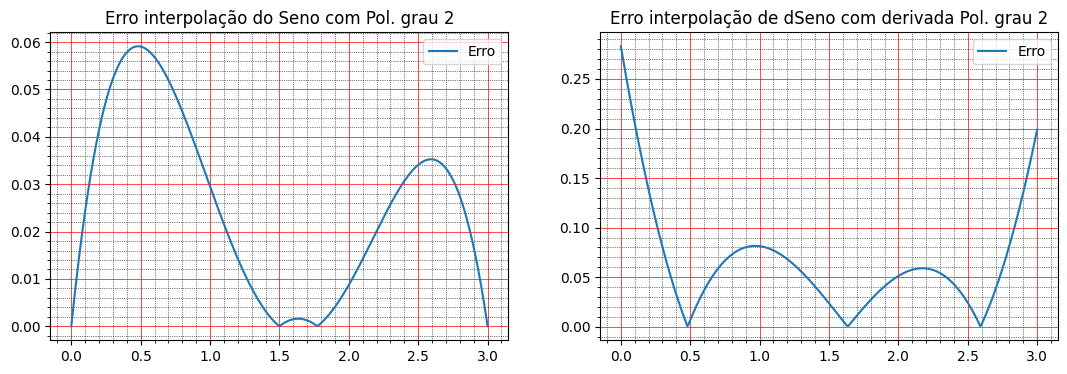

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))

intervalo_interp = [0, 1.5, 3]
sin_interp = np.sin(intervalo_interp)

coefs_interp = interp(intervalo_interp, sin_interp)
dcoefs_interp = derivada(coefs_interp)

def make_interval(i,e, step=0.01):
    r = np.arange(i, e, step)
    if(r[-1] < e):
        r = np.append(r, e)
    return r

intervalo = make_interval(0, 3)
seno = np.sin(intervalo)
dseno = np.cos(intervalo)
seno_interp = polyval(coefs_interp, intervalo)
dseno_interp = polyval(dcoefs_interp, intervalo)

plt.subplot(1,2,1)
erro = np.abs(seno - seno_interp)
plt.plot(intervalo,erro, label="Erro")
ax1.set_axisbelow(True)
ax1.minorticks_on()
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Erro interpolação do Seno com Pol. grau 2")
plt.legend()

plt.subplot(1,2,2)
derro = np.abs(dseno - dseno_interp)
plt.plot(intervalo,derro, label="Erro")
ax2.set_axisbelow(True)
ax2.minorticks_on()
ax2.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Erro interpolação de dSeno com derivada Pol. grau 2")
plt.legend()

fig = plt.gcf()

In [12]:
for ax in fig.axes:
    assert len(ax.get_title()) >= 10

Quem tem mais erro: a aproximação da função ou da derivada?
(Talvez você tenha que ajustar `ylim` para ver melhor o gráfico)

A aproximação da Derivada, claramente, tem um erro maior. Vendo pelo gráfico, que possui uma grade bem explícita, é possível ver que, mesmo ignorados os erros das extremidades dos intervalos, os erros da derivada chegam a um valor de $0.08$, enquanto o erro da aproximação da função chega, no máximo, a um erro de $0.06$.

Considerando as extremidades, o erro de aproximação chegam a um valor maior do que $0.28$, mostrando que a aproximação da derivada é maior.

## Questão 3: mais graus!

Faça também para os graus 4, 6 e 8.

Máximas diferença de erro - Pol. grau 4: 
0.016538157636382722
Máximas diferença de erro - Pol. grau 6: 
0.0005040667667452758
Máximas diferença de erro - Pol. grau 8: 
8.690999378530018e-06

Diferenças das médias de erro - Pol. grau 4: 
0.001841551683894034
Diferenças das médias de erro - Pol. grau 6: 
3.429280937455083e-05
Diferenças das médias de erro - Pol. grau 8: 
3.946587385928932e-07



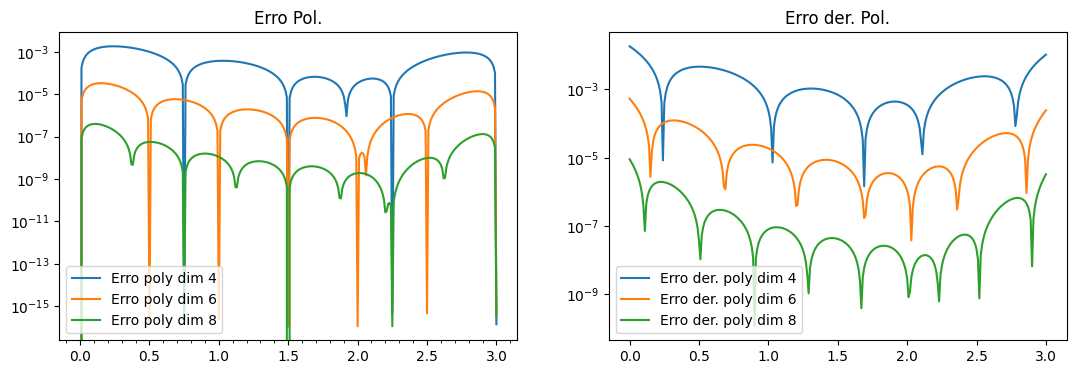

In [64]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))

def make_interval(i,e, step=0.01):
    r = np.arange(i, e, step)
    if(r[-1] < e):
        r = np.append(r, e)
    return r

intervalo = make_interval(0, 3)
seno = np.sin(intervalo)
dseno = np.cos(intervalo)

def eval_erro_derro(grau, interv):
    intervalo_interp = make_interval(0,3,3/grau)
    sin_interp = np.sin(intervalo_interp)
    coefs_interp = interp(intervalo_interp, sin_interp)
    dcoefs_interp = derivada(coefs_interp)
    seno_interp = polyval(coefs_interp, interv)
    dseno_interp = polyval(dcoefs_interp, interv)
    erro = np.abs(seno - seno_interp)
    derro = np.abs(dseno - dseno_interp)
    return (erro, derro)

(erro4, derro4) = eval_erro_derro(4, intervalo)
(erro6, derro6) = eval_erro_derro(6, intervalo)
(erro8, derro8) = eval_erro_derro(8, intervalo)

# Erros de Função
plt.subplot(1,2,1)
plt.semilogy(intervalo, erro4, label="Erro poly dim 4")
plt.semilogy(intervalo, erro6, label="Erro poly dim 6")
plt.semilogy(intervalo, erro8, label="Erro poly dim 8")
ax1.set_axisbelow(True)
ax1.minorticks_on()
plt.title("Erro Pol.")
plt.legend()

# Erros de Derivada
plt.subplot(1,2,2)
plt.semilogy(intervalo, derro4, label="Erro der. poly dim 4")
plt.semilogy(intervalo, derro6, label="Erro der. poly dim 6")
plt.semilogy(intervalo, derro8, label="Erro der. poly dim 8")
ax1.set_axisbelow(True)
ax1.minorticks_on()
plt.title("Erro der. Pol.")
plt.legend()

print("Máximas diferença de erro - Pol. grau 4: ")
print(np.max(derro4) - np.max(erro4))
print("Máximas diferença de erro - Pol. grau 6: ")
print(np.max(derro6) - np.max(erro6))
print("Máximas diferença de erro - Pol. grau 8: ")
print(np.max(derro8) - np.max(erro8))
print()

print("Diferenças das médias de erro - Pol. grau 4: ")
print(np.average(np.abs(derro4 - erro4)))
print("Diferenças das médias de erro - Pol. grau 6: ")
print(np.average(np.abs(derro6 - erro6)))
print("Diferenças das médias de erro - Pol. grau 8: ")
print(np.average(np.abs(derro8 - erro8)))
print()

fig = plt.gcf()

In [14]:
assert len(fig.axes) == 2
for ax in fig.axes:
    assert len(ax.lines) == 3

In [15]:
for ax in fig.axes:
    assert len(ax.get_title()) >= 10
    assert len(ax.get_legend().texts) == 3

In [16]:
fig = None

O erro é maior para aproximar a função ou a derivada?  De quanto?

Pelo gráfico o erro é claramente maior para a Derivada.

Para as interpolações para polinômio de grau 4, temos:

* Erro máximo do erro da aproximação do Seno com o erro da aproximação da Derivada do Seno: __E ~ 0.017__
* Média dos erros da aproximação do Seno com as médias dos erros da aproximação da Derivada do Seno: __E ~ 0.0018__

Para as interpolações para polinômio de grau 6, temos:

* Erro máximo do erro da aproximação do Seno com o erro da aproximação da Derivada do Seno: __E ~ 0.00050__
* Média dos erros da aproximação do Seno com as médias dos erros da aproximação da Derivada do Seno: __E ~ 0.000034__

Para as interpolações para polinômio de grau 8, temos:

* Erro máximo do erro da aproximação do Seno com o erro da aproximação da Derivada do Seno: __E ~ 0.0000086__
* Média dos erros da aproximação do Seno com as médias dos erros da aproximação da Derivada do Seno: __E ~ 0.00000039__

O erro da aproximação da derivada é maior no centro ou nas extremidades?  Isso é esperado?

O Erro das Aproximações da derivada é claramente maior na extremidade. As interpolações tendem a ter inclinações mais fortes próximos dos pontos em que as funções a serem interpoladas foram definidas - porque são os locais onde o ajuste é feito para a interpolação atender tais valores. 

É possível ver que nas aproximações das funções (não nas suas derivadas), os erros são maiores também nas extremidades, e esses erros são propagados para as derivadas.

Entretanto, as derivadas não tem a obrigação de atender o valor das funções nos pontos de interpolação, sendo propagados ao máximo nessas extremidades.

### Outros graus

Faça agora com graus 3, 5, 7 e 9.

Máximas diferença de erro - Pol. grau 3: 
0.17974748291455056
Máximas diferença de erro - Pol. grau 5: 
0.010898378140368759
Máximas diferença de erro - Pol. grau 7: 
0.0002959214785360764
Máximas diferença de erro - Pol. grau 9: 
4.666826229043908e-06

Diferenças das médias de erro - Pol. grau 3: 
0.049951589347828666
Diferenças das médias de erro - Pol. grau 5: 
0.00163299088758591
Diferenças das médias de erro - Pol. grau 7: 
2.7512270413207516e-05
Diferenças das médias de erro - Pol. grau 9: 
3.011311675818805e-07



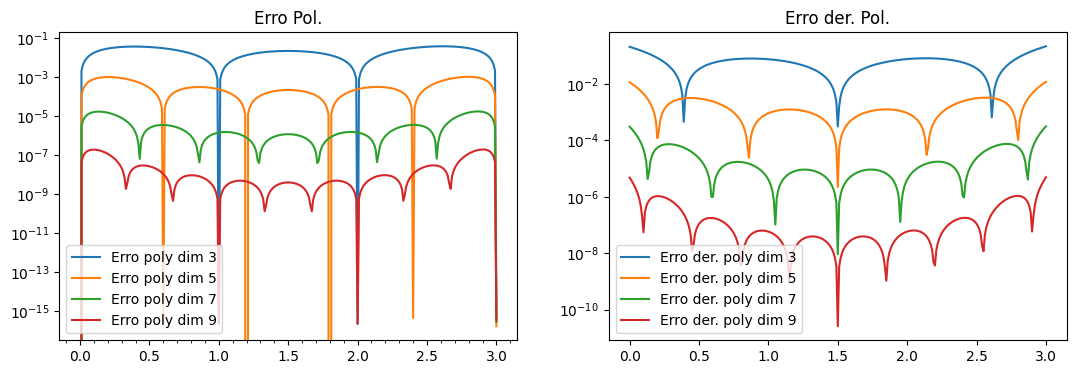

In [63]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))

def make_interval(i,e, step=0.01):
    r = np.arange(i, e, step)
    if(r[-1] < e):
        r = np.append(r, e)
    return r

intervalo = make_interval(0, 3)
seno = np.sin(intervalo)
dseno = np.cos(intervalo)

def eval_erro_derro(grau, interv):
    intervalo_interp = make_interval(0,3,3/grau)
    sin_interp = np.sin(intervalo_interp)
    coefs_interp = interp(intervalo_interp, sin_interp)
    dcoefs_interp = derivada(coefs_interp)
    seno_interp = polyval(coefs_interp, interv)
    dseno_interp = polyval(dcoefs_interp, interv)
    erro = np.abs(seno - seno_interp)
    derro = np.abs(dseno - dseno_interp)
    return (erro, derro)

(erro3, derro3) = eval_erro_derro(3, intervalo)
(erro5, derro5) = eval_erro_derro(5, intervalo)
(erro7, derro7) = eval_erro_derro(7, intervalo)
(erro9, derro9) = eval_erro_derro(9, intervalo)

# Erros de Função
plt.subplot(1,2,1)
plt.semilogy(intervalo, erro3, label="Erro poly dim 3")
plt.semilogy(intervalo, erro5, label="Erro poly dim 5")
plt.semilogy(intervalo, erro7, label="Erro poly dim 7")
plt.semilogy(intervalo, erro9, label="Erro poly dim 9")
ax1.set_axisbelow(True)
ax1.minorticks_on()
plt.title("Erro Pol.")
plt.legend()

# Erros de Derivada
plt.subplot(1,2,2)
plt.semilogy(intervalo, derro3, label="Erro der. poly dim 3")
plt.semilogy(intervalo, derro5, label="Erro der. poly dim 5")
plt.semilogy(intervalo, derro7, label="Erro der. poly dim 7")
plt.semilogy(intervalo, derro9, label="Erro der. poly dim 9")
ax1.set_axisbelow(True)
ax1.minorticks_on()
plt.title("Erro der. Pol.")
plt.legend()

print("Máximas diferença de erro - Pol. grau 3: ")
print(np.max(derro3) - np.max(erro3))
print("Máximas diferença de erro - Pol. grau 5: ")
print(np.max(derro5) - np.max(erro5))
print("Máximas diferença de erro - Pol. grau 7: ")
print(np.max(derro7) - np.max(erro7))
print("Máximas diferença de erro - Pol. grau 9: ")
print(np.max(derro9) - np.max(erro9))
print()

print("Diferenças das médias de erro - Pol. grau 3: ")
print(np.average(np.abs(derro3 - erro3)))
print("Diferenças das médias de erro - Pol. grau 5: ")
print(np.average(np.abs(derro5 - erro5)))
print("Diferenças das médias de erro - Pol. grau 7: ")
print(np.average(np.abs(derro7 - erro7)))
print("Diferenças das médias de erro - Pol. grau 9: ")
print(np.average(np.abs(derro9 - erro9)))
print()

fig = plt.gcf()

In [18]:
assert len(fig.axes) == 2
for ax in fig.axes:
    assert len(ax.lines) == 4

In [19]:
fig = None

Comente as diferenças e similaridades com o caso anterior.
O que você acha que aconteceu?

Vê-se claramente que continua havendo a tendência de o erro diminuir na medida em que o grau do polinômio interpolador aumenta, assim como aumentam o número de pontos a serem utilizados na interpolação. Isso já estava sendo esperado.

Os valores dos erros de interpolação continua consistentes, sendo os erros de graus maiores menores que os de grau menor, sendo esses graus ímpares ou pares.

Entretanto, uma característica extremamente interessante, tanto das derivadas quanto das funções originais, em relação aos valores interpolados, no caso dos graus de polinômio interpolador ímpares, é que os erros são simétricos em relação ao centro do intervalo interpolador. No caso das interpolações pares, o erro não é simétrico, ficando um pouco menor no lado direito do intervalo.

Parece que, nas interpolações de grau ímpar, a um ponto central no intervalo que é sempre aproximado, e os pontos a serem interpolados estão mais distribuídos em torno desse centro, distribuindo de forma melhor o erro.

## Questão 4: Erros de regressão

Calcule a função seno em 31 pontos igualmente espaçados no intervalo $[0,3]$,
e use-os para ajustar os polinômios de regressão de graus 2, 4, 6 e 8.

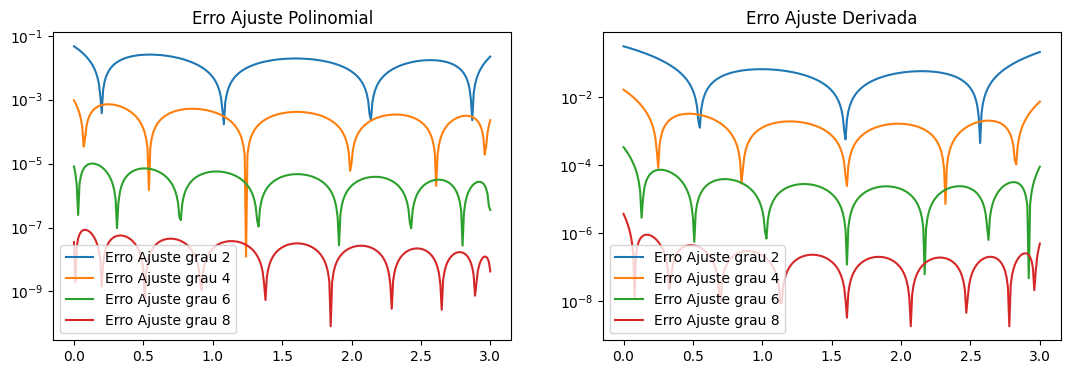

In [77]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))

intervalo_regressao = make_interval(0,3,3/30)
seno_regressao = np.sin(intervalo_regressao)

coef_regress2 = regress(intervalo_regressao, seno_regressao, 2)
coef_regress4 = regress(intervalo_regressao, seno_regressao, 4)
coef_regress6 = regress(intervalo_regressao, seno_regressao, 6)
coef_regress8 = regress(intervalo_regressao, seno_regressao, 8)

dcoef_regress2 = derivada(coef_regress2)
dcoef_regress4 = derivada(coef_regress4)
dcoef_regress6 = derivada(coef_regress6)
dcoef_regress8 = derivada(coef_regress8)

intervalo = make_interval(0, 3)
seno = np.sin(intervalo)
dseno = np.cos(intervalo)

regress2 = polyval(coef_regress2, intervalo) 
regress4 = polyval(coef_regress4, intervalo) 
regress6 = polyval(coef_regress6, intervalo) 
regress8 = polyval(coef_regress8, intervalo) 

dregress2 = polyval(dcoef_regress2, intervalo) 
dregress4 = polyval(dcoef_regress4, intervalo) 
dregress6 = polyval(dcoef_regress6, intervalo) 
dregress8 = polyval(dcoef_regress8, intervalo) 

erro2 = np.abs(regress2 - seno)
erro4 = np.abs(regress4 - seno)
erro6 = np.abs(regress6 - seno)
erro8 = np.abs(regress8 - seno)

derro2 = np.abs(dregress2 - dseno)
derro4 = np.abs(dregress4 - dseno)
derro6 = np.abs(dregress6 - dseno)
derro8 = np.abs(dregress8 - dseno)

plt.subplot(1,2,1)
plt.semilogy(intervalo, erro2, label="Erro Ajuste grau 2")
plt.semilogy(intervalo, erro4, label="Erro Ajuste grau 4")
plt.semilogy(intervalo, erro6, label="Erro Ajuste grau 6")
plt.semilogy(intervalo, erro8, label="Erro Ajuste grau 8")
plt.title("Erro Ajuste Polinomial")
plt.legend()

plt.subplot(1,2,2)
plt.semilogy(intervalo, derro2, label="Erro Ajuste grau 2")
plt.semilogy(intervalo, derro4, label="Erro Ajuste grau 4")
plt.semilogy(intervalo, derro6, label="Erro Ajuste grau 6")
plt.semilogy(intervalo, derro8, label="Erro Ajuste grau 8")
plt.title("Erro Ajuste Derivada")
plt.legend()

fig = plt.gcf()

In [74]:
assert len(fig.axes) == 2
for ax in fig.axes:
    assert len(ax.lines) == 4

Compare os erros de ajuste da função (seno), entre este método e o uso dos polinômios interpoladores.

YOUR ANSWER HERE

Compare os erros de ajuste das derivadas.

YOUR ANSWER HERE

## Questão 5: Derivadas centrais

Qual seria o tamanho do passo necessário para calcular uma aproximação da derivada usando a derivada central,
de forma a obter um erro comparável com ajuste do polinômio de grau 2? E de grau 4?

Faça os cálculos abaixo, indicando **como você chegou nestes valores**.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Agora, faça o ajuste dos polinômios de grau 12, 14 e 16, por interpolação, no intervalo $[0,3]$.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Qual a magnitude do erro que você obtém para a derivada, no intervalo $[0,3]$?

YOUR ANSWER HERE

Qual seria o passo no método das derivadas centrais para obter esse erro?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Comente

YOUR ANSWER HERE

# Parte 2: Interpolação com derivadas

Suponha que, além dos valores $y_i = f(x_i)$, também possuímos $z_i = f'(x_i)$.
Deveríamos ser capazes de calcular melhores polinômios interpoladores!

## Questão 6: Equações

Suponha que são dados apenas 2 pontos.
- Quais equações os coeficientes do polinômio devem satisfazer?
- Qual o grau deste polinômio?
- A matriz deste sistema é inversível?

YOUR ANSWER HERE

No caso geral, quais são as novas equações que os coeficientes $p_i$ devem satisfazer?

YOUR ANSWER HERE

Escreva a função `matrix_der(xs,d)` que calcula a matriz que multiplica estes coeficientes,
(nas novas equações)
em função dos pontos `xs` onde sabemos as derivadas e do grau `d` que o polinômio terá.

(Essa função é análoga à função que constrói a matriz para a interpolação e regressão)

In [ ]:
def matrix_der(xs, d):
    xs = np.asarray(xs, dtype=float)
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
M1 = matrix_der([1,2,3], 3)
ans = [[ 0.,  1.,  2.,  3.],
       [ 0.,  1.,  4., 12.],
       [ 0.,  1.,  6., 27.]]
assert np.allclose(M1, ans)

In [ ]:
M1 = matrix_der([1,2,3,4,5], 3)
assert np.shape(M1) == (5,4)

In [ ]:
M1 = matrix_der([1,2,3,4,5], 8)
assert np.shape(M1) == (5,9)

## Questão 7: Resolvendo o sistema

Para construir matrizes e vetores em "blocos", você pode usar `np.hstack`, `np.vstack` e/ou `np.block`.

In [ ]:
def interp1(xs, ys, zs):
    "Retorna os coeficientes do polinomio interpolador para os pontos  (xs, ys), com respectivas derivadas zs."
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
coefs = interp1([0], [1], [1])
assert np.allclose(coefs, [1,1])

In [ ]:
coefs = interp1([1], [1], [1])
assert np.allclose(coefs, [0,1])

Explique a resposta dos dois `assert`s acima (analiticamente)

YOUR ANSWER HERE

In [ ]:
coefs = interp1([0,1], [1,1], [1,1])
assert np.allclose(coefs, [1,1,-3,2])

In [ ]:
xs = np.array([0,1.0])
ys = np.array([1,3.0])
zs = np.array([1,1.0])
coefs = interp1(xs, ys, zs)
assert np.allclose(coefs, [1,1,3,-2])

Explique porque os coeficientes de grau 0 e 1 são os mesmos de só fazer a interpolação no zero.

YOUR ANSWER HERE

## Questão 8: Erro

O erro decai conforme aumentamos o número de pontos?
Teste para as funções $f(x) = \cos(x)$ e $g(x) = e^x$ no intervalo $[-1, 2]$.

In [ ]:
# Gráficos de erro para o cosseno
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert len(ax.get_title()) >= 10
assert len(ax.lines) >= 5

In [ ]:
ax = None

In [ ]:
# Gráficos de erro para a função exponencial
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert len(ax.get_title()) >= 10
assert len(ax.lines) >= 5

## Questão 9: Comparando

Há duas formas de obter um polinômio de grau 9 para interpolar a função cosseno:
- calcular a função em 10 pontos igualmente espaçados;
- calcular a função e sua derivada em 5 pontos igualmente espaçados.

Faça um gráfico dos erros, no interalo $[-1,2]$, para cada um destes polinômios.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Para termos uma medida quantitativa,
calcule a soma dos valores absolutos dos erros,
para vários pontos ao longo do intervalo $[-1,2]$

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Faça o mesmo estudo para polinômios de grau 7, 11 e 15.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

O que você observa?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Refaça para a função exponencial, com vários graus.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

O que você viu no caso do cosseno se mantém aqui?
Porque você acha que isso aconteceu?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()